# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [60]:
#Analysis
#Trend 1: Maximum Temperature increases as you get closer to the equator. There also seem to be
        #more cities that are in higher latitudes with cooler weather, than those in the lower latidudes, which may be 
        #due to randomness of cities chosen. 
#Trend 2: From the 600 or so cities chosen at random, more have a humidity greater than 50% than those less than 50%.
# Trend 3: Wind speed for cities across the world seems to be contained mostly below 15 miles per hour, with only a few
        #cities having higher wind speeds.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
#from api_keys import api_key

api_key = "5cc6b69b8d92426ac3fd60dcb8cd6fa4"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#60 requests per minute 

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
city_missed =[]

counter = 0

print("Beginning Data Retrieval")     
print("-----------------------------")

for x in cities:
    try:
        response = requests.get(query_url + x).json()
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        counter = counter + 1
        print("Processing Record " +str(counter) + ": " + x)
    except:
        print("City not found. Skipping...")
        city_missed.append(x)
    time.sleep(2)

print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: port alfred
Processing Record 2: punta arenas
Processing Record 3: rikitea
City not found. Skipping...
Processing Record 4: saskylakh
City not found. Skipping...
Processing Record 5: khatanga
Processing Record 6: hermanus
Processing Record 7: husavik
Processing Record 8: san vicente
Processing Record 9: vao
Processing Record 10: tautira
Processing Record 11: ouro preto do oeste
Processing Record 12: albany
Processing Record 13: ushuaia
Processing Record 14: atuona
Processing Record 15: fortuna
Processing Record 16: ende
Processing Record 17: davila
Processing Record 18: butaritari
Processing Record 19: kavaratti
Processing Record 20: sawakin
Processing Record 21: kavieng
Processing Record 22: cape town
Processing Record 23: el tigre
Processing Record 24: srednekolymsk
City not found. Skipping...
Processing Record 25: dudinka
Processing Record 26: astorga
Processing Record 27: skjervoy
City not found. Skipping..

Processing Record 236: peace river
Processing Record 237: kuching
Processing Record 238: san quintin
Processing Record 239: seymchan
Processing Record 240: novichikha
Processing Record 241: les cayes
Processing Record 242: la romana
Processing Record 243: atbasar
Processing Record 244: rurrenabaque
Processing Record 245: sicamous
Processing Record 246: santa vitoria do palmar
Processing Record 247: gernsheim
Processing Record 248: usinsk
Processing Record 249: fenoarivo
City not found. Skipping...
Processing Record 250: los llanos de aridane
Processing Record 251: lompoc
Processing Record 252: dong xoai
Processing Record 253: viedma
City not found. Skipping...
Processing Record 254: nanortalik
Processing Record 255: valdosta
Processing Record 256: sakaiminato
City not found. Skipping...
Processing Record 257: beya
City not found. Skipping...
Processing Record 258: imbituba
Processing Record 259: lexington
Processing Record 260: cotonou
Processing Record 261: talara
Processing Record 26

Processing Record 464: haines junction
Processing Record 465: miandrivazo
Processing Record 466: mananjary
Processing Record 467: vuktyl
City not found. Skipping...
Processing Record 468: tashla
City not found. Skipping...
Processing Record 469: kahului
Processing Record 470: owando
Processing Record 471: puerto suarez
Processing Record 472: kindu
Processing Record 473: locri
Processing Record 474: nueva germania
Processing Record 475: itarema
Processing Record 476: tisovec
Processing Record 477: walvis bay
City not found. Skipping...
Processing Record 478: libertador general san martin
Processing Record 479: berdigestyakh
Processing Record 480: batemans bay
Processing Record 481: waipawa
Processing Record 482: naryan-mar
Processing Record 483: taunggyi
Processing Record 484: ridgeland
Processing Record 485: buala
City not found. Skipping...
Processing Record 486: shieli
Processing Record 487: lasa
Processing Record 488: oranjestad
Processing Record 489: lazaro cardenas
Processing Reco

In [26]:
len(city)+len(city_missed)

618

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
dict = {"City": city, "Cloudiness": cloudiness, "Country": country,
                "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lon,
                "Max Temp": max_temp, "Wind Speed": wind_speed}

df = pd.DataFrame(dict)

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,0,ZA,1538764267,80,-33.59,26.89,68.09,13.33
1,Punta Arenas,75,CL,1538762400,53,-53.16,-70.91,51.80,20.80
2,Rikitea,88,PF,1538764271,100,-23.12,-134.97,71.87,14.23
3,Saskylakh,0,RU,1538764257,88,71.97,114.09,26.42,10.98
4,Khatanga,32,RU,1538764280,91,71.98,102.47,34.07,10.42


In [56]:
df1 = df.loc[df['Humidity'] != 290]

humidity = df1['Humidity']
lat = df1['Lat']
max_temp = df1['Max Temp']
cloudiness = df1['Cloudiness']
wind_speed = df1['Wind Speed']

df1.to_csv('city_weather_output.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

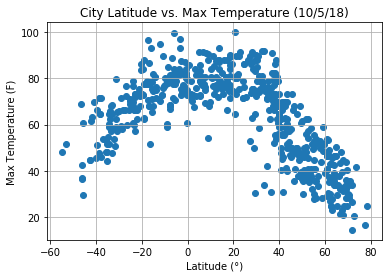

In [52]:
plt.scatter(lat, max_temp)
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/5/18)')
plt.grid()
plt.savefig('latitude_max_temp.png')

#### Latitude vs. Humidity Plot

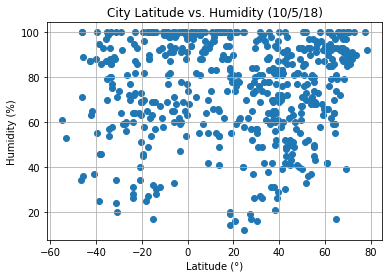

In [53]:
plt.scatter(lat, humidity)
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/5/18)')
plt.grid()
plt.savefig('latitude_humidity.png')

#### Latitude vs. Cloudiness Plot

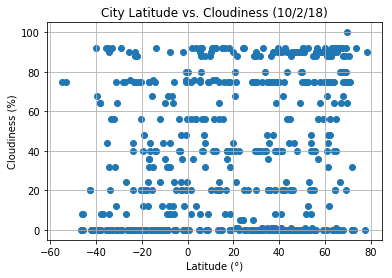

In [54]:
plt.scatter(lat, cloudiness)
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/2/18)')
plt.grid()
plt.savefig('latitude_cloudiness.png')

#### Latitude vs. Wind Speed Plot

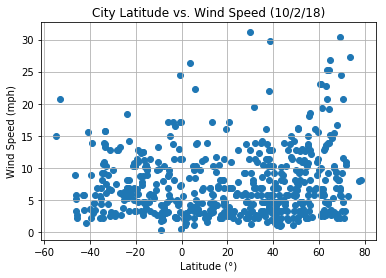

In [55]:
plt.scatter(lat, wind_speed)
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/2/18)')
plt.grid()
plt.savefig('latitude_windspeed.png')